# Practica 2 Alumnos

Importamos las librerias necesarias para la realización de este apartado

In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as pl

import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
pl.rcParams['figure.figsize'] = (16, 9)
pl.style.use('ggplot')

Leemos el csv de los datos

In [2]:
data=pd.read_csv("estudiantes.csv")#Leemos el fichero csv
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Ahora realizaremos un describe para conocer adecuadamente qeu rangos debemos de poner en cada una de las asignaturas. Simplemente habría que mirar desde la fila min hasta max y definir los rangos según lo propuesto en el enunciado, es decir muy mala, mala, buena o muy buena

In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Los dos siguientes fragmentos de codigo, lo unico que haran sera pasar todas esas variables categoricas a numeros. Primero haremos un astype('category') de cada variable que tenga valores categoricos. Y en el siguiente fragmento se asiganará un numero, dependiendo este del numero de posibilidades que haya en cada variable, y lo establecera en el dataset. Un buen ejemplo seria, en la variable de gender, se cogera su columna, se analizara que hay dos posibilidades y para la primera establecerá un 0 y para la segunda un 1. 

In [4]:
data["gender"]=data['gender'].astype('category')
data["race/ethnicity"]=data['race/ethnicity'].astype('category')
data["parental level of education"]=data['parental level of education'].astype('category')
data["lunch"]=data['lunch'].astype('category')
data["test preparation course"]=data['test preparation course'].astype('category')

In [5]:
data["gender"]=data['gender'].cat.codes
data["race/ethnicity"]=data['race/ethnicity'].cat.codes
data["parental level of education"]=data['parental level of education'].cat.codes
data["lunch"]=data['lunch'].cat.codes
data["test preparation course"]=data['test preparation course'].cat.codes

Representamos los datos, ya teniendo los datos disponibles para clasificar, todos en valor numérico

In [6]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


# 1.Realiza todo el preprocesamiento necesario para poder entrenar el clasificador y muestra las distintas tablas de distribución. 

Aqui podremos ver, cuales son las variables que mas afectan a la hora de predecir la nota de una asignatura, en este caso simplemente haremos uso de las calificaciones para predecir la nota de su respectiva asignatura.

<AxesSubplot:>

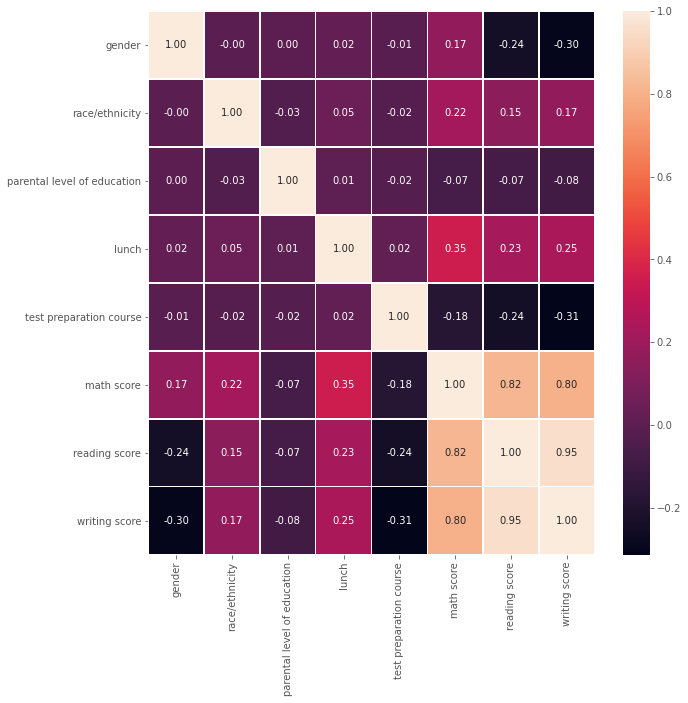

In [7]:
f,ax = pl.subplots(figsize=(10, 10))
sb.heatmap(data.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

Para cada valores de X, se hará uso de las calificaciones de las que no se hace la clasificación. Como Y1 es la clasificación de Math Score, haremos uso de reading y writing, y seguiremos ese proceso para la creación de los tres clasificadores

In [8]:
#Datos Primer clasificador
X1=np.array(data[["reading score","writing score"]])
Y1=np.array(data['math score'])
#Datos Segundo clasificador
X2=np.array(data[["math score","writing score"]])
Y2=np.array(data['reading score'])
#Datos Tercer clasificador
X3=np.array(data[["reading score","math score"]])
Y3=np.array(data['writing score'])

El siguiente paso, será estimar el numero de K del que debemos de hacer uso para poder entrenar y clasificar el modelo de una forma adecuada. Para ello haremos uso de la función KMeans, la cual nos ayudará a generar una gráfica que nos permitirá estimar de una forma adecuada el valor de k del que debemos de hacer uso.

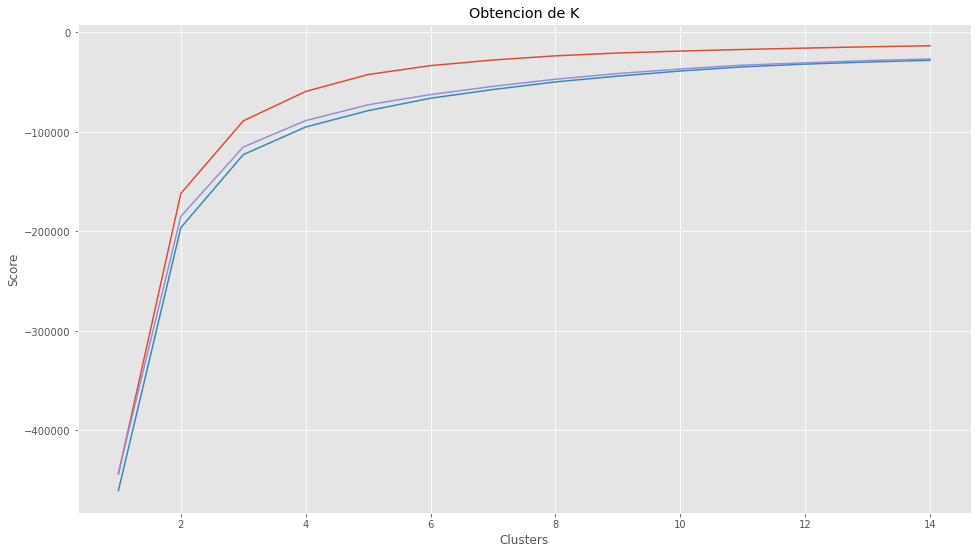

In [9]:
#Definimos el tamaño del grafico
tam = range(1, 15)
#Hacemos uso de la funcion Kmeans dentro del rango definido
kmeans = [KMeans(n_clusters=i) for i in tam]
kmeans
#Empezamos a estimar con el Kmeans y los valores iniciales de cada clasificador cual debe ser el numero de k para cada uno
score1 = [kmeans[i].fit(X1).score(X1) for i in range(len(kmeans))]
score1
score2 = [kmeans[i].fit(X2).score(X2) for i in range(len(kmeans))]
score2
score3 = [kmeans[i].fit(X3).score(X3) for i in range(len(kmeans))]
score3
#Representamos las tres curvas 
pl.plot(tam,score1)
pl.plot(tam,score2)
pl.plot(tam,score3)
pl.xlabel('Clusters')
pl.ylabel('Score')
pl.title('Obtencion de K')
pl.show()

Podemos ver, en la curva, que un entrenamiento y clasificacion precisa se podria dar a partir de los 3 cluster, para asegurarnos, pondremos en cada clasificador 4, para así no tener problemas a la hora de predecir las notas de un nuevo alumno

In [10]:
#Entrenamos con 4 cluster para cada uno de los clasificadores
#Math score
kmeans1 = KMeans(n_clusters=4).fit(X1)
#Reading Score
kmeans2 = KMeans(n_clusters=4).fit(X2)
#Writing Score
kmeans3 = KMeans(n_clusters=4).fit(X3)
#Señalamos los centroides en cada clasificador
#Math Score
centroids1 = kmeans1.cluster_centers_
#Reading Score
centroids2 = kmeans2.cluster_centers_
#Writing Score
centroids3 = kmeans3.cluster_centers_
print('Centroides Math Score')
print('---------------------')
print(centroids1)
print('Centroides Reading Score')
print('---------------------')
print(centroids2)
print('Centroides Writing Score')
print('---------------------')
print(centroids3)

Centroides Math Score
---------------------
[[60.94444444 59.71895425]
 [88.80102041 88.39795918]
 [45.44927536 43.04347826]
 [74.56388889 73.65      ]]
Centroides Reading Score
---------------------
[[68.71693122 71.97089947]
 [56.35483871 57.26523297]
 [84.67782427 85.71548117]
 [39.93269231 42.17307692]]
Centroides Writing Score
---------------------
[[86.84       85.26222222]
 [60.51485149 57.72607261]
 [73.86956522 69.86666667]
 [45.74015748 41.81102362]]


En este paso empezaremos a predecir los datos a partir del algoritmo Kmeans, y a mostrarlo por colores cada una de las clases.

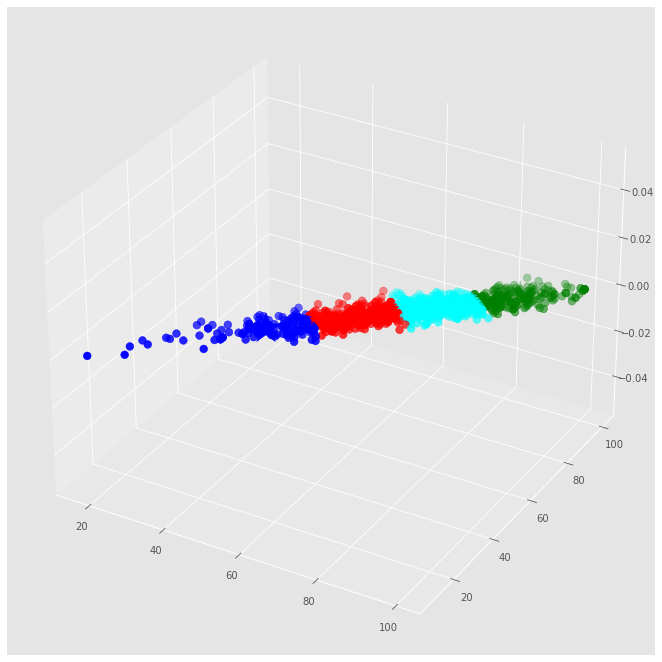

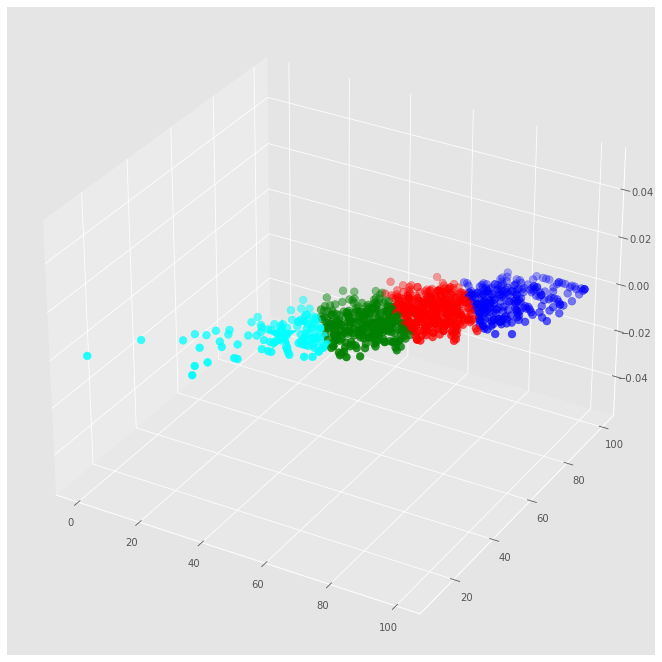

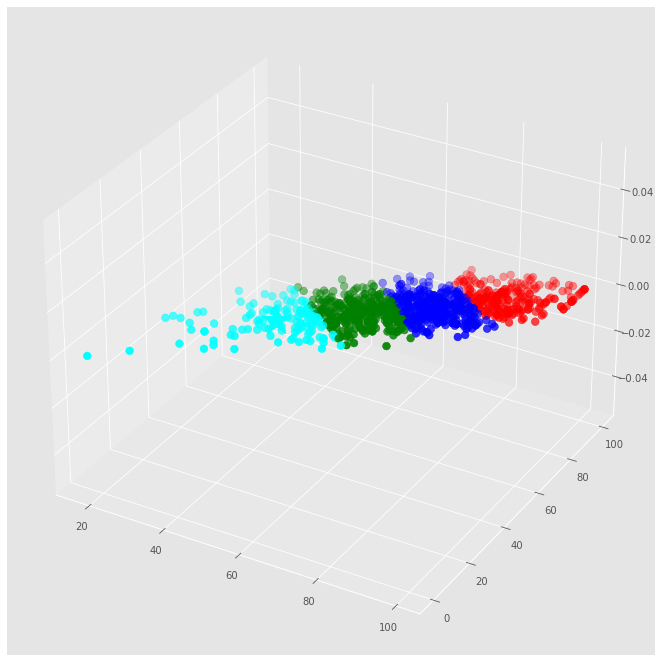

In [11]:
#Predecimos los valores del cluster
#Math Score
labels1 = kmeans1.predict(X1)
#Reading Score
labels2 = kmeans2.predict(X2)
#Writing Score
labels3 = kmeans3.predict(X3)

# Sacamos de nuevo los centroides
#Math Score
C1 = kmeans1.cluster_centers_
#Reading Score
C2 = kmeans2.cluster_centers_
#Writing Score
C3 = kmeans3.cluster_centers_

#Definimos los colores con lo que seran representado cada clase, haciendo referencia al tipo de calificacion que tengan en cada asignatura
colores=['red','green','blue','cyan']

#Definiremos una matriz auxiliar para cada clasificacion en el que se iran metiendo los datos del cluster y se iran clasificando por colores
#Math Score
aux1=[]
#Reading Score
aux2=[]
#Writing Score
aux3=[]

#Bucle que recorre los datos del kmeans de cada clasificador
#Math Score
for row in labels1:
    aux1.append(colores[row])
#Reading Score
for row in labels2:
    aux2.append(colores[row])
#Writing Score
for row in labels3:
    aux3.append(colores[row])

#Pasamos a la representacion 3D de cada clasificador, respecto a los datos obtenidos por el kmeans
#Math Score
graf1 = pl.figure()
ax1 = Axes3D(graf1)
ax1.scatter(X1[:, 0], X1[:, 1], c=aux1,s=60)
ax1.scatter(C1[:, 0], C1[:, 1], marker='*', c=colores, s=1000)

#Reading Score
graf2 = pl.figure()
ax2 = Axes3D(graf2)
ax2.scatter(X2[:, 0], X2[:, 1], c=aux2,s=60)
ax2.scatter(C2[:, 0], C2[:, 1], marker='*', c=colores, s=1000)

#Writing Score
graf3 = pl.figure()
ax3 = Axes3D(graf3)
ax3.scatter(X3[:, 0], X3[:, 1], c=aux3,s=60)
ax3.scatter(C3[:, 0], C3[:, 1], marker='*', c=colores, s=1000)

Para obtener una vista mejor, haremos una representación 2D de cada par de variables respecto a su clasificador

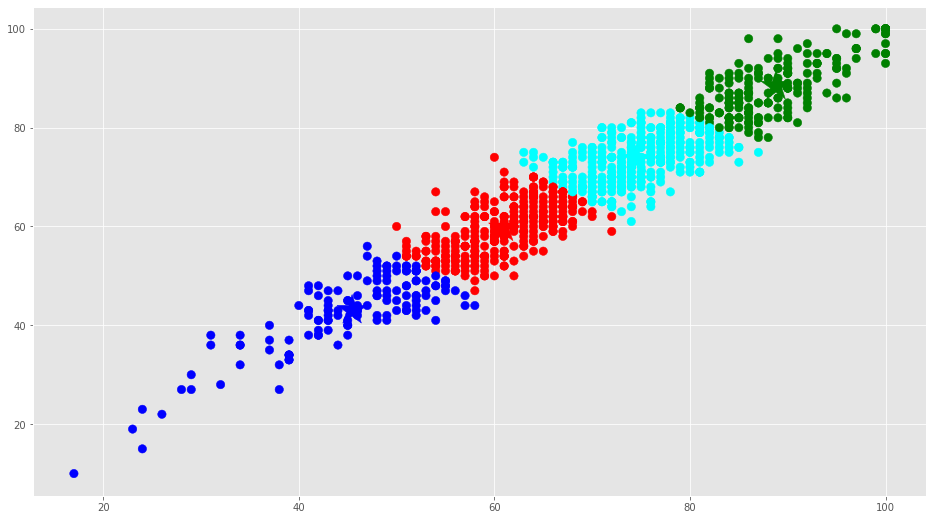

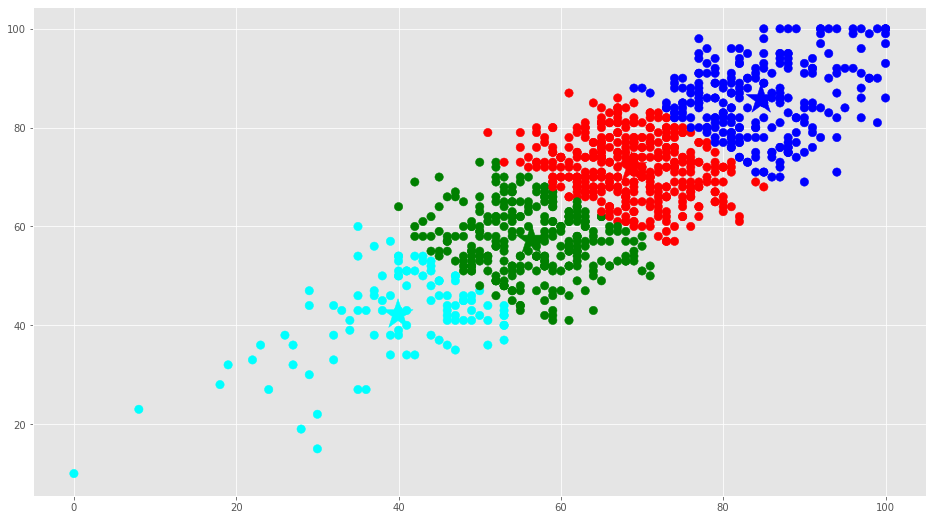

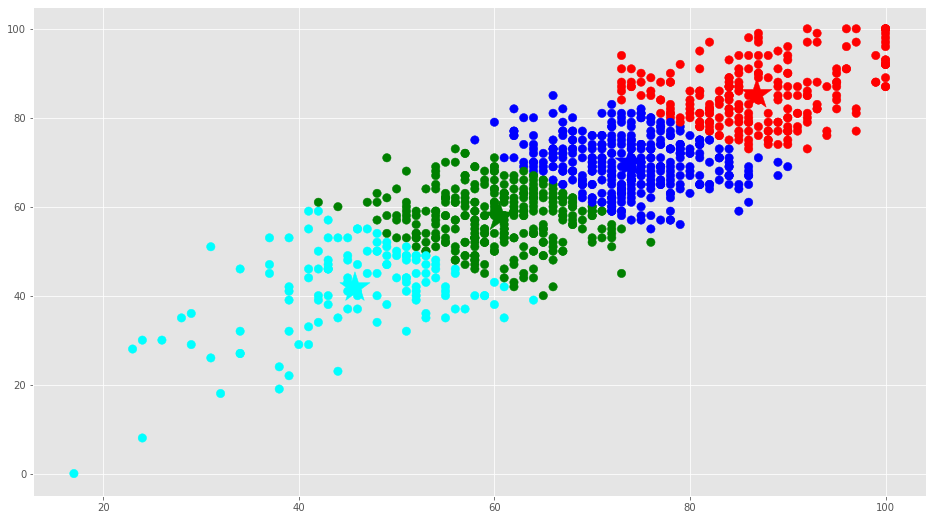

In [12]:

f1 = data['reading score'].values
f2 = data['writing score'].values
f3 = data['math score'].values

#Representacion 2D de la clasificacion Math Score
pl.scatter(f1, f2, c=aux1, s=70)
pl.scatter(C1[:, 0], C1[:, 1], marker='*', c=colores, s=1000)
pl.show()

#Representacion 2D de la clasificacion Reading Score
pl.scatter(f3, f2, c=aux2, s=70)
pl.scatter(C2[:, 0], C2[:, 1], marker='*', c=colores, s=1000)
pl.show()

#Representacion 2D de la clasificacion Writing Score
pl.scatter(f1, f3, c=aux3, s=70)
pl.scatter(C3[:, 0], C3[:, 1], marker='*', c=colores, s=1000)
pl.show()

Ahora mostraremos todas las tablas de distribucucion generadas, una por cada clasificador

In [13]:
#Creamos los dataframe que recogeran esas tablas
TablaDis1=pd.DataFrame()
TablaDis2=pd.DataFrame()
TablaDis3=pd.DataFrame()

#Copiamos los valores referentes a cada clasificador en cada una de las tablas
TablaDis1['math score']=data['math score'].values
TablaDis1['label'] = labels1;
TablaDis2['reading score']=data['reading score'].values
TablaDis2['label'] = labels2;
TablaDis3['writing score']=data['writing score'].values
TablaDis3['label'] = labels3;

#Finalmente mostraremos cuantos puntos a colocado en cada color, en cada uno de los clasificadores a traves de estas tablas
FinalMaths =  pd.DataFrame()
FinalRead =  pd.DataFrame()
FinalWrite =  pd.DataFrame()

#Hacemos una columna donde se copien los colores
FinalMaths['color']=colores
FinalRead['color']=colores
FinalWrite['color']=colores

#Hacemos una fila donde se pongan cuantos puntos hay para cada rango
FinalMaths['math score']=TablaDis1.groupby('label').size()
FinalMaths['Clase']=['Clase 0','Clase 1','Clase 2','Clase 3']

FinalRead['reading score']=TablaDis2.groupby('label').size()
FinalRead['Clase']=['Clase 0','Clase 1','Clase 2','Clase 3']

FinalWrite['writing score']=TablaDis3.groupby('label').size()
FinalWrite['Clase']=['Clase 0','Clase 1','Clase 2','Clase 3']

print(TablaDis1)
print(TablaDis2)
print(TablaDis3)

     math score  label
0            72      3
1            69      1
2            90      1
3            47      2
4            76      3
..          ...    ...
995          88      1
996          62      0
997          59      3
998          68      3
999          77      1

[1000 rows x 2 columns]
     reading score  label
0               72      0
1               90      2
2               95      2
3               57      3
4               78      0
..             ...    ...
995             99      2
996             55      1
997             71      1
998             78      0
999             86      2

[1000 rows x 2 columns]
     writing score  label
0               74      2
1               88      2
2               93      0
3               44      1
4               75      2
..             ...    ...
995             95      0
996             55      1
997             65      1
998             77      2
999             86      0

[1000 rows x 2 columns]


In [14]:
print(FinalMaths)
print(FinalRead)
print(FinalWrite)

   color  math score    Clase
0    red         307  Clase 0
1  green         196  Clase 1
2   blue         137  Clase 2
3   cyan         360  Clase 3
   color  reading score    Clase
0    red            377  Clase 0
1  green            280  Clase 1
2   blue            239  Clase 2
3   cyan            104  Clase 3
   color  writing score    Clase
0    red            225  Clase 0
1  green            303  Clase 1
2   blue            345  Clase 2
3   cyan            127  Clase 3


# 2. Crea los tres clasificadores e indica su error. Úsalo para saber a qué clase corresponden al menos 10 alumnos que no hayas usado para entrenar los modelos. 

Ahora, en este segundo apartado, una vez ya estan creados los 3 clasificadores, indicaremos su error y mostraremos la prediccion de las notas de unos alumnos que no han sido utilizados ni para entrenar ni para clasificar

Prediccion Clase Math Score

In [15]:
X_new1 = np.array([[57.74,15.66],[90.74,90.66],[30.74,15.66],[40.74,15.66],[70.74,70.66],[30,30],[60,60],[30,70],[50,50],[45,30]])
new_labels1 = kmeans1.predict(X_new1)
print(new_labels1)

[2 1 2 2 3 2 0 2 2 2]


Prediccion Clase Reading Score

In [16]:
X_new2 = np.array([[57.74,15.66],[90.74,90.66],[30.74,15.66],[40.74,15.66],[70.74,70.66],[30,30],[60,60],[30,70],[50,50],[45,30]])
new_labels2 = kmeans2.predict(X_new2)
print(new_labels2)

[3 2 3 3 0 3 1 1 1 3]


Prediccion Clase Writing Score

In [17]:
X_new3 = np.array([[57.74,15.66],[90.74,90.66],[30.74,15.66],[40.74,15.66],[70.74,70.66],[30,30],[60,60],[30,70],[50,50],[45,30]])
new_labels3 = kmeans3.predict(X_new3)
print(new_labels3)

[3 0 3 3 2 3 1 3 3 3]
